In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
%matplotlib inline

In [22]:
df_x = pd.read_csv('/Users/user/Downloads/訓練資料/v2-用卡方篩/training_X_times-卡方.csv')
df_x.head()

,月營收創高,張外資,由於台股,在三大法人,盤中一度大,個股如下買進,股如下買進賣,如下買進賣出,單位元張,券商主要進出,...,大漲逾點,玉晶光嘉,高台股今日,及外資,高台股今,跌深反彈股,汽車類,回元關卡,其餘個股如,漲收
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
df_y = pd.read_csv('/Users/user/Downloads/訓練資料/v2-用卡方篩/training_Y-卡方.csv')
df_y.head()

,y
0,1
1,1
2,1
3,1
4,1


In [24]:
df_x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4382 entries, 0 to 4381
Columns: 2128 entries, 月營收創高 to 漲收
dtypes: int64(2128)
memory usage: 71.1 MB


In [25]:
df_y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4382 entries, 0 to 4381
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   y       4382 non-null   int64
dtypes: int64(1)
memory usage: 34.4 KB


In [26]:
#將資料分成訓練組及測試組
from sklearn.model_selection import train_test_split

#X軸先不用

X_train, X_test, y_train, y_test = train_test_split(df_x,df_y,test_size=0.2,random_state=101)


In [27]:
X_train

,月營收創高,張外資,由於台股,在三大法人,盤中一度大,個股如下買進,股如下買進賣,如下買進賣出,單位元張,券商主要進出,...,大漲逾點,玉晶光嘉,高台股今日,及外資,高台股今,跌深反彈股,汽車類,回元關卡,其餘個股如,漲收
558,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3247,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
934,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3788,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3230,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4079,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4171,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
599,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1361,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
X_test

,月營收創高,張外資,由於台股,在三大法人,盤中一度大,個股如下買進,股如下買進賣,如下買進賣出,單位元張,券商主要進出,...,大漲逾點,玉晶光嘉,高台股今日,及外資,高台股今,跌深反彈股,汽車類,回元關卡,其餘個股如,漲收
940,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3192,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4228,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4253,0,0,0,0,0,0,0,0,0,0,...,2,0,0,0,0,0,0,0,0,0
121,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3290,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
287,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3411,0,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1683,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
#使用隨機森林與決策樹做比較
from sklearn.ensemble import RandomForestClassifier

#n_estimator代表要使用多少CART樹（CART樹為使用GINI算法的決策樹）
rfc = RandomForestClassifier(n_estimators=100)

#從訓練組資料中建立隨機森林模型
rfc.fit(X_train,y_train)

#預測測試組是否發生
rfc_pred = rfc.predict(X_test)

<ipython-input-29-70ea1ba0d36e>:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(X_train,y_train)


In [30]:
#利用confusion matrix來看實際及預測的差異
print(confusion_matrix(y_test,rfc_pred))

[[245 178]
 [150 304]]


In [31]:
#利用classification report來看precision、recall、f1-score、support
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

          -1       0.62      0.58      0.60       423
           1       0.63      0.67      0.65       454

    accuracy                           0.63       877
   macro avg       0.63      0.62      0.62       877
weighted avg       0.63      0.63      0.63       877



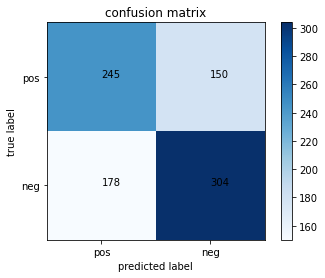

In [41]:
 import matplotlib.pyplot as plt
import numpy as np

confusion = np.array(confusion_matrix(y_test,rfc_pred))
# 熱度圖，設置顏色
plt.imshow(confusion, cmap=plt.cm.Blues)
# ticks 坐標軸的坐標點
# label 坐標軸標籤說明
indices = range(len(confusion))
# 第一個是迭代對象，表示坐標的顯示順序，第二個是坐標軸顯示列表
#plt.xticks(indices, [0, 1, 2])
#plt.yticks(indices, [0, 1, 2])
plt.xticks(indices, ['pos', 'neg'])
plt.yticks(indices, ['pos', 'neg'])

plt.colorbar()

plt.xlabel('predicted label')
plt.ylabel('true label')
plt.title('confusion matrix')


# 顯示數據
for first_index in range(len(confusion)):  #第几列
    for second_index in range(len(confusion[first_index])):  #第几行
        plt.text(first_index, second_index, confusion[first_index][second_index])
plt.show()